# Introduction to the Data Sets

> Written by Dr Daniel Buscombe, Northern Arizona University

> Part of a series of notebooks for image recognition and classification using deep convolutional neural networks

The data sets provided are hosting within an Amazon Web Services S3 bucket

In [1]:
import s3fs
fs = s3fs.S3FileSystem(anon=True)
fs.ls('cdi-workshop')

['cdi-workshop/fully_conv_semseg',
 'cdi-workshop/imrecog_data',
 'cdi-workshop/semseg_data']

## Looking at file structure

There are three major subdirectories:
* 'imrecog_data': contains example data sets for image recognition
* 'semseg_data': contains example data sets for semantic segmentation
* 'fully_conv_semseg': contains example data sets for fully convolutional semantic segmentation

In [2]:
fs.ls('cdi-workshop/imrecog_data')

['cdi-workshop/imrecog_data/EuroSAT',
 'cdi-workshop/imrecog_data/Imagenet',
 'cdi-workshop/imrecog_data/NWPU-RESISC45',
 'cdi-workshop/imrecog_data/UCMerced_LandUse',
 'cdi-workshop/imrecog_data/plankton']

In [ ]:
fs.ls('cdi-workshop/semseg_data')

In [3]:
len(fs.ls('cdi-workshop/semseg_data/gc/train'))

16

In [4]:
fs.ls('cdi-workshop/imrecog_data/NWPU-RESISC45/test/')

['cdi-workshop/imrecog_data/NWPU-RESISC45/test/airplane',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/airport',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/baseball_diamond',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/basketball_court',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/beach',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/bridge',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/chaparral',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/church',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/circular_farmland',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/cloud',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/commercial_area',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/dense_residential',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/desert',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/forest',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/freeway',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/golf_course',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/t

## Reading and displaying imagery

In [5]:
from imageio import imread
import matplotlib.pyplot as plt

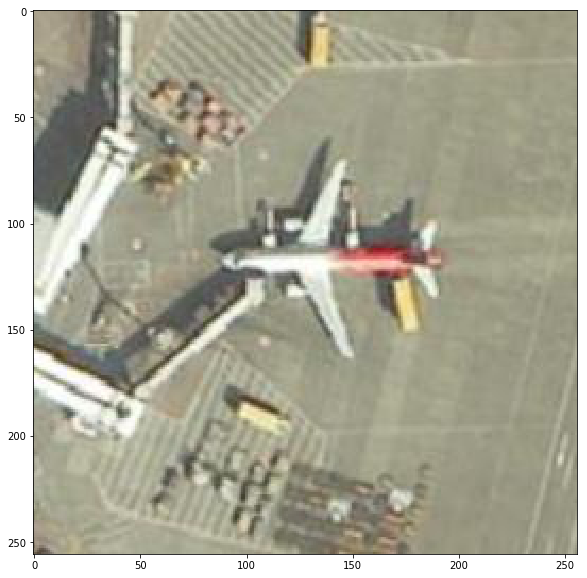

In [6]:
with fs.open('cdi-workshop/imrecog_data/NWPU-RESISC45/test/airplane/airplane_700.jpg', 'rb') as f:
    image = imread(f, 'jpg')
    plt.figure(0, figsize=(10,10))
    plt.imshow(image);

In [7]:
fs.ls('cdi-workshop/imrecog_data/NWPU-RESISC45/test')

['cdi-workshop/imrecog_data/NWPU-RESISC45/test/airplane',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/airport',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/baseball_diamond',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/basketball_court',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/beach',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/bridge',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/chaparral',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/church',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/circular_farmland',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/cloud',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/commercial_area',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/dense_residential',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/desert',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/forest',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/freeway',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/golf_course',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/t

In [10]:
names = [f for f in fs.ls('cdi-workshop/imrecog_data/NWPU-RESISC45/test/baseball_diamond') if f.endswith('.jpg')]
names = names[:10]
names

['cdi-workshop/imrecog_data/NWPU-RESISC45/test/baseball_diamond/baseball_diamond_002.jpg',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/baseball_diamond/baseball_diamond_003.jpg',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/baseball_diamond/baseball_diamond_004.jpg',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/baseball_diamond/baseball_diamond_005.jpg',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/baseball_diamond/baseball_diamond_006.jpg',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/baseball_diamond/baseball_diamond_007.jpg',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/baseball_diamond/baseball_diamond_009.jpg',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/baseball_diamond/baseball_diamond_010.jpg',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/baseball_diamond/baseball_diamond_011.jpg',
 'cdi-workshop/imrecog_data/NWPU-RESISC45/test/baseball_diamond/baseball_diamond_014.jpg']

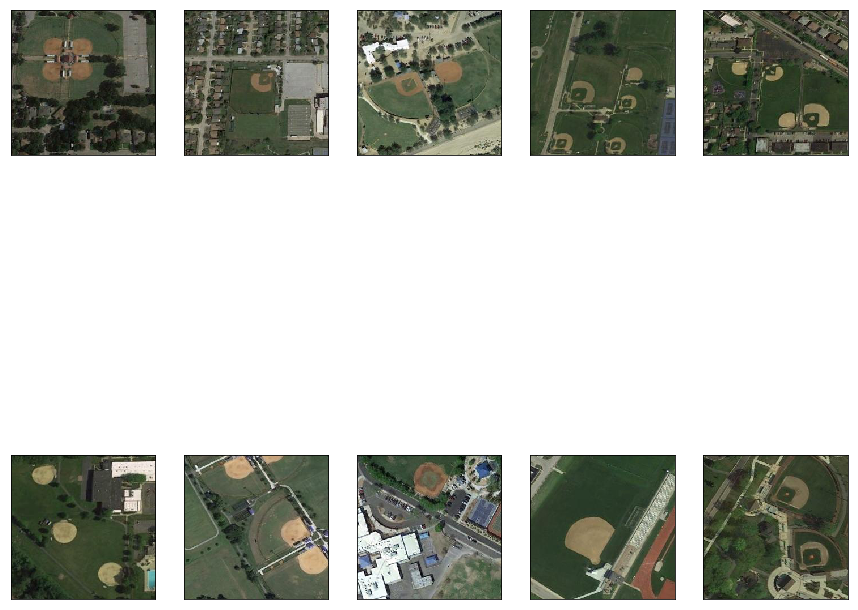

In [13]:
fig, ax = plt.subplots(2, 5)
fig.set_figheight(15)
fig.set_figwidth(15)
for i, axi in enumerate(ax.flat):
    with fs.open(names[i], 'rb') as f:
        image = imread(f, 'jpg')
    axi.imshow(image)
    axi.set(xticks=[], yticks=[])

## Read Labels

In [14]:
fs.ls('cdi-workshop/semseg_data/gc/labels')

['cdi-workshop/semseg_data/gc/labels/labels.txt']

In [15]:
with fs.open('cdi-workshop/semseg_data/gc/labels/labels.txt', 'rb') as f:
      labels = f.readlines()

labels = [x.strip() for x in labels] 
print(labels)
print(labels[0].decode())

[b'rock', b'sand', b'veg', b'water']
rock


## Read binary data files

In [16]:
from scipy.io import loadmat

In [17]:
with fs.open('cdi-workshop/semseg_data/ontario/test/A2014862_geotag_mres.mat') as f:
    dat = loadmat(f)

In [18]:
dat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'labels', 'sparse', 'preds', 'class'])

In [19]:
dat['labels']

array(['sediment', 'terrain ', 'water   ', 'veg     ', 'anthro  '],
      dtype='<U8')